In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target  # Features and labels

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## Creating Model and Prediction

In [4]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [5]:
knn.fit(X,y)

KNeighborsClassifier()

In [6]:
X_new = np.array([[1.6,2.3,3.4,4.5],
                  [10.6,11.7,22.5,11.7]])

In [7]:
predictions = knn.predict(X_new)

In [8]:
print('Predictions: {}' .format(predictions)) # They are Iris versicolor and Iris virginia

Predictions: [1 2]


# Evaluation of Model Performance and Hyperparameter Tuning

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify = y)

In [10]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9555555555555556


## Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# to make feature values have standard values by scaling them 

## Hyperparameter Tuning

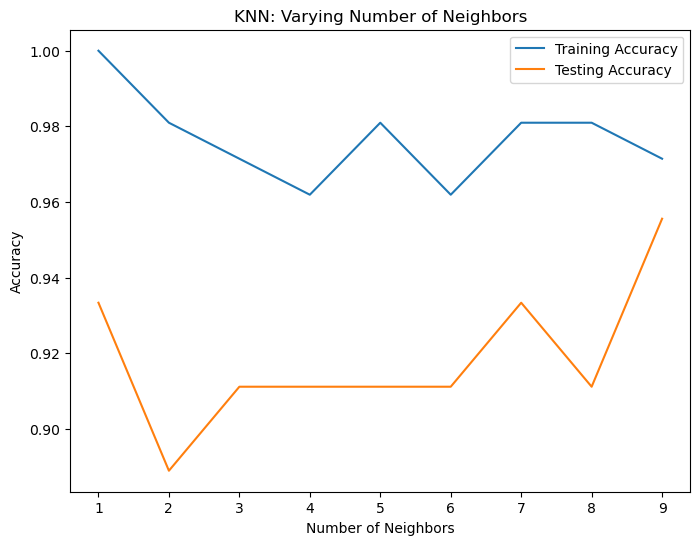

In [20]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,10)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train , y_train)
    train_accuracies[neighbor] = knn.score(X_train , y_train)
    test_accuracies[neighbor] = knn.score(X_test , y_test)

plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show() 

# ChatGPT Code 
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target  # Features and labels

In [3]:
# Split data into 80% training and 20% testing with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Scaling X_train and X_test

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Create Model and Make Prediction

In [5]:
# Initialize KNN with k=5 (default)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
y_pred = knn.predict(X_test)

## Evaluate Model Performance

In [7]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


## Hyperparameter Tuning, Finding the Best k (neighbor) value

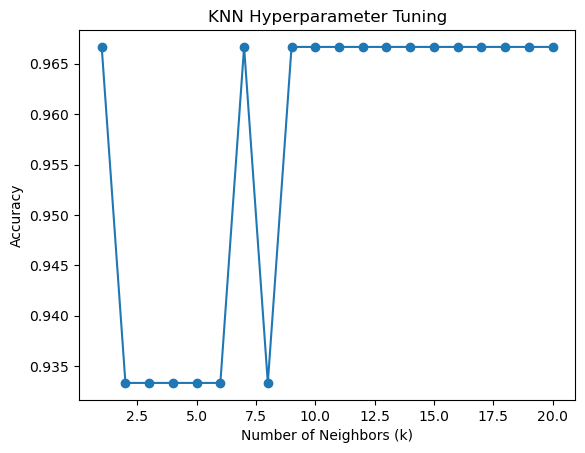

In [8]:
accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs. k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.show() 

# Interpretation of ChatGPT


In [ ]:
Key Observations:
For k = 1:

The accuracy is very high (~96.7%).
This suggests that the model is closely fitting the training data.
However, k = 1 can lead to overfitting because the model simply memorizes the nearest neighbor.

For k = 2 to 6:

The accuracy significantly drops to around 93.3%.
This suggests that these values of k may not be optimal for generalizing well.

For k = 7:

Accuracy suddenly increases back to 96.7%.
This might indicate that k = 7 is a better choice to balance bias and variance.

For k = 9 onwards:

The accuracy stabilizes at a high value (~96.7%).
This suggests that higher k values (9-20) provide stable and reliable performance.

Choosing the Best k:
k = 1 achieves high accuracy but may overfit.
k = 7 or higher (e.g., 9, 11, etc.) provides stable performance.
If you want less variance, choosing a value like k = 9 or 11 would be a good option.
Conclusion:
Best k: Values around 7-11 seem to be optimal.
Avoid k = 2 to 6, as accuracy is lower.
Higher k values (9-20) provide consistent accuracy, meaning the model is stable.    